In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:
df=pd.read_csv("manufacturing.csv")
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [70]:
df.shape

(3957, 6)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [72]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [73]:
# statistic summary
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [74]:
df.corr()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


<Axes: >

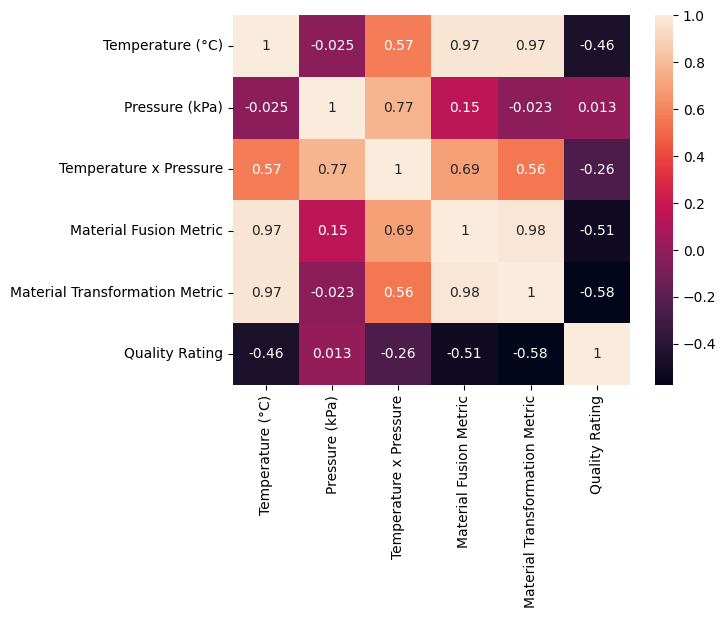

In [75]:
# showing correlation using heatmap 
sns.heatmap(df.corr(),annot=True)

In [76]:
df.columns

Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Quality Rating'],
      dtype='object')

In [77]:
X=df.drop('Quality Rating',axis=1)
y=df['Quality Rating']

In [78]:
# split data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
polynomial=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=polynomial.fit_transform(X_train)
X_test_poly=polynomial.transform(X_test)

In [80]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

In [81]:
y_pred=regression.predict(X_test_poly)
y_pred

array([ 20.83769991, 101.31382244,  98.61651299,  99.79313466,
       100.69852978, 100.39253176,  99.62837897, 100.22396178,
       100.023374  ,  53.38628454,  97.00666647,  99.75097907,
        99.53394407, 101.08202865, 100.34273051, 100.54628651,
        99.30303102,  98.51540021, 101.22511097, 102.73992401,
        99.6204475 , 103.61635979,  99.53237069,  50.09860197,
       100.6101897 ,  47.22035779,  98.51087889, 100.46213942,
        98.05084647,  98.82900404,  99.11244156,  97.8521319 ,
       100.63880519, 100.56731553, 100.47326144, 103.37738822,
       100.45751086, 100.75172619, 100.43023906,  99.97989792,
       100.22980973, 104.48498059,  43.40782835, 102.81205421,
        99.60122074, 100.14765361,  97.27560347,  47.68176128,
       100.45229023,  98.34036855, 103.16246046, 100.56367705,
        98.27399923,  59.74330489,  30.21733938,  98.9647954 ,
       100.97196107, 101.16135164,  99.67200832,  97.78975512,
        99.71347727,  99.09708239,  96.99789932,  98.12

In [82]:
print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred))
print('r2 score : ',r2_score(y_test,y_pred))

mean_absolute_error :  1.7258288019436498
mean_squared_error :  6.962166537487351
r2 score :  0.9658969099636405
